In [5]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind


In [6]:
# Load your last 100 games
with open("last_100_chess_games.json", "r") as file:
    games = json.load(file)


In [7]:
from google.colab import files
uploaded = files.upload()

Saving last_100_chess_games.json to last_100_chess_games (1).json


In [8]:
with open("last_100_chess_games.json", "r") as file:
    games = json.load(file)

In [9]:
# Extract relevant data
extracted_data = []
for game in games:
    color = "White" if game["white"]["username"].lower() == "samuraibartu" else "Black"
    result = game["white"]["result"] if color == "White" else game["black"]["result"]
    my_rating = game["white"]["rating"] if color == "White" else game["black"]["rating"]
    opponent_rating = game["black"]["rating"] if color == "White" else game["white"]["rating"]

    extracted_data.append({
        "Date": pd.to_datetime(game["end_time"], unit='s'),
        "Time Control": game.get("time_control"),
        "Time Class": game.get("time_class"),
        "Result": result,
        "My Color": color,
        "My Rating": my_rating,
        "Opponent Rating": opponent_rating,
        "Opponent Username": game["black"]["username"] if color == "White" else game["white"]["username"],
        "URL": game.get("url")
    })

df = pd.DataFrame(extracted_data)
df["Rating Diff"] = df["My Rating"] - df["Opponent Rating"]
df["Win"] = df["Result"].apply(lambda x: 1 if x == "win" else 0)

df.head()


,Date,Time Control,Time Class,Result,My Color,My Rating,Opponent Rating,Opponent Username,URL,Rating Diff,Win
0,2025-04-09 12:40:16,180+2,blitz,resigned,Black,1458,1445,JensJensen_3636,https://www.chess.com/game/live/137192779550,13,0
1,2025-04-09 12:47:27,180+2,blitz,win,Black,1465,1409,romualdocruz,https://www.chess.com/game/live/137192880606,56,1
2,2025-04-09 12:54:44,180+2,blitz,resigned,White,1456,1418,romualdocruz,https://www.chess.com/game/live/137193097752,38,0
3,2025-04-09 12:56:35,180+2,blitz,win,Black,1464,1457,JoelEdisan1970,https://www.chess.com/game/live/137193321262,7,1
4,2025-04-09 13:02:40,180+2,blitz,win,Black,1472,1471,feodor92,https://www.chess.com/game/live/137193378240,1,1


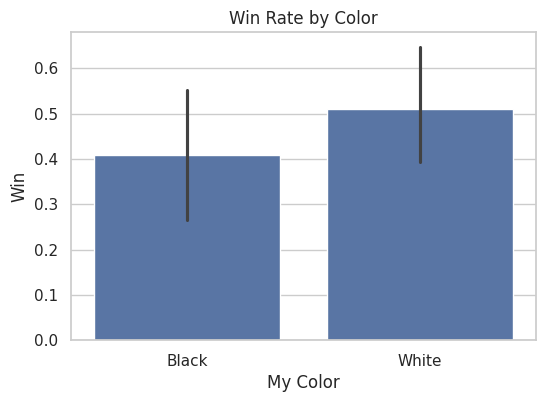

In [10]:
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x="My Color", y="Win")
plt.title("Win Rate by Color")
plt.show()


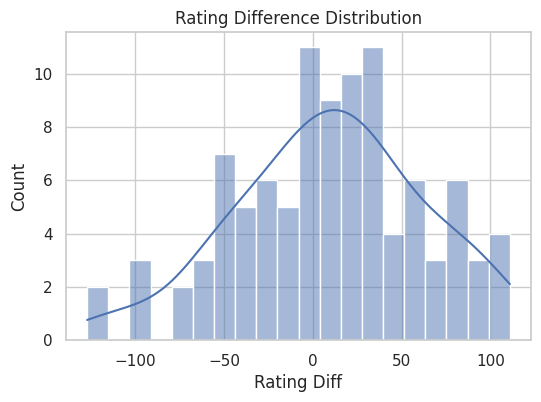

In [11]:
plt.figure(figsize=(6, 4))
sns.histplot(df["Rating Diff"], bins=20, kde=True)
plt.title("Rating Difference Distribution")
plt.show()


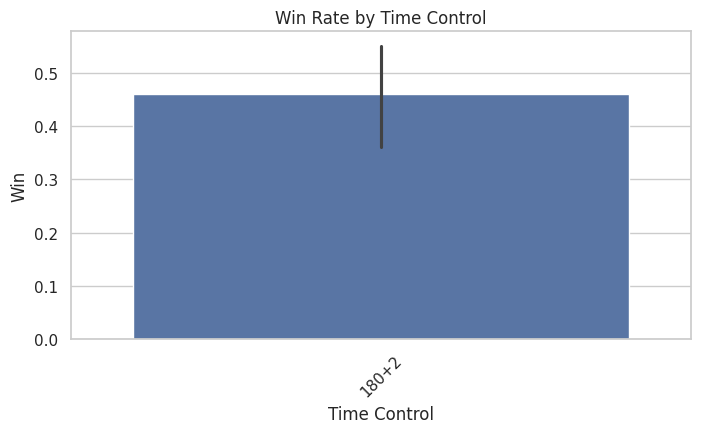

In [12]:
plt.figure(figsize=(8, 4))
sns.barplot(data=df, x="Time Control", y="Win")
plt.title("Win Rate by Time Control")
plt.xticks(rotation=45)
plt.show()


In [13]:
greater = df[df["Rating Diff"] > 0]["Win"]
less_equal = df[df["Rating Diff"] <= 0]["Win"]
t_stat, p_val = ttest_ind(greater, less_equal)

print("T-statistic:", round(t_stat, 3))
print("P-value:", round(p_val, 5))
if p_val < 0.05:
    print("✅ Rating difference has a statistically significant effect on win rate.")
else:
    print("❌ No significant effect detected.")


T-statistic: 2.437
P-value: 0.0166
✅ Rating difference has a statistically significant effect on win rate.
